## Introduction

This notebook contains basics descriptive and inferential statistics using R and follows the pedagogy of the **Practical time series analysis from Coursera** and few other sources. This is the _first part_ of the series.

### Contents:
1. Basic Plotting in R
2. Linear regression
3. T- Test

<h2><center>1. Basic Plotting in R</center></h2>
___
## Computing Five Number Summary and Standard Deviation

In [11]:
## storing data in an array
data.1=c(35, 8, 10, 23, 42)

## Five number summary
print (summary(data.1))

## Mean can also be computed like this
print (sum(data.1)/5)

## Standard Deviation
print (sd(data.1))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    8.0    10.0    23.0    23.6    35.0    42.0 
[1] 23.6
[1] 14.97665


## Plotting Histogram

The dataset is composed of integer values and we are trying to plot a univariate distribution of the data points via a histogram.<br>

**hist** command is used to plot a histogram where:
- xlab, ylab: can be used to define the labels
- main: Title of the plot
- breaks: bins of the histogram

**lines** produces a density plot of the data set whose linewidth and col are defined using parameters _lwd_ and _col_ respectively.

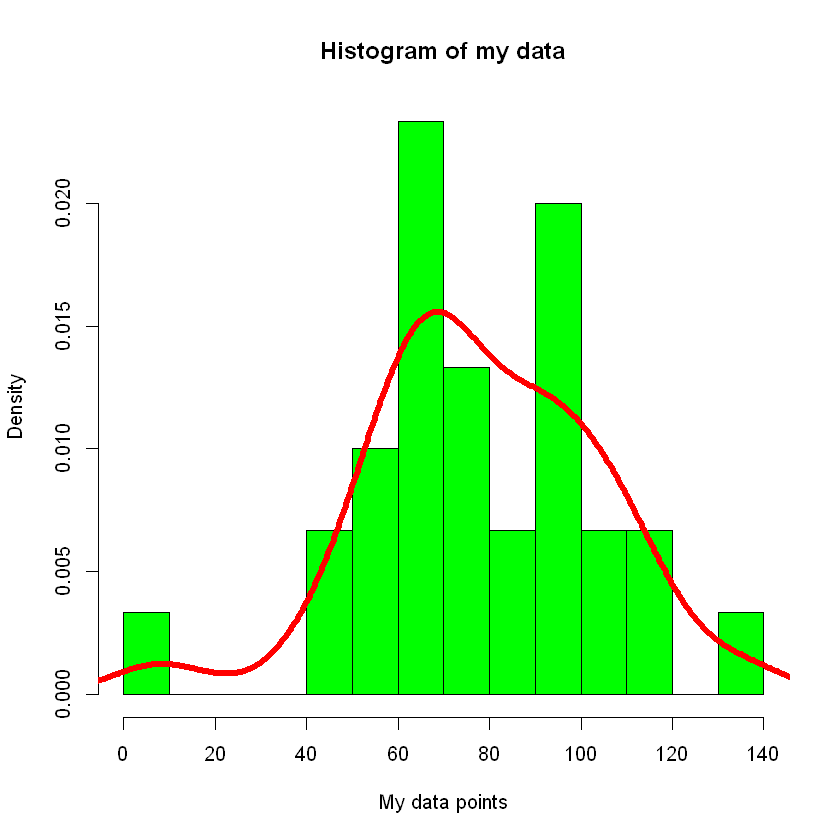

In [9]:
## loading a dataset
small.size.dataset=c(91,49,76,112,97,42,70, 100, 8, 112, 95, 90, 78, 62, 56, 94, 65, 58, 109, 70, 109, 91, 71, 76, 68, 62, 134, 57, 83, 66)

## Plotting a histogram
hist(small.size.dataset, xlab='My data points', main='Histogram of my data', freq=F, col='green', breaks=10)
## adding deslines
lines(density(small.size.dataset), col='red', lwd=5)

## Plotting Scatterplot

To check the bi-variate distribution of the data, scatterplot is used. Here, two random normal distributions are produced using **rnorm** and then both are used for the scatterplot

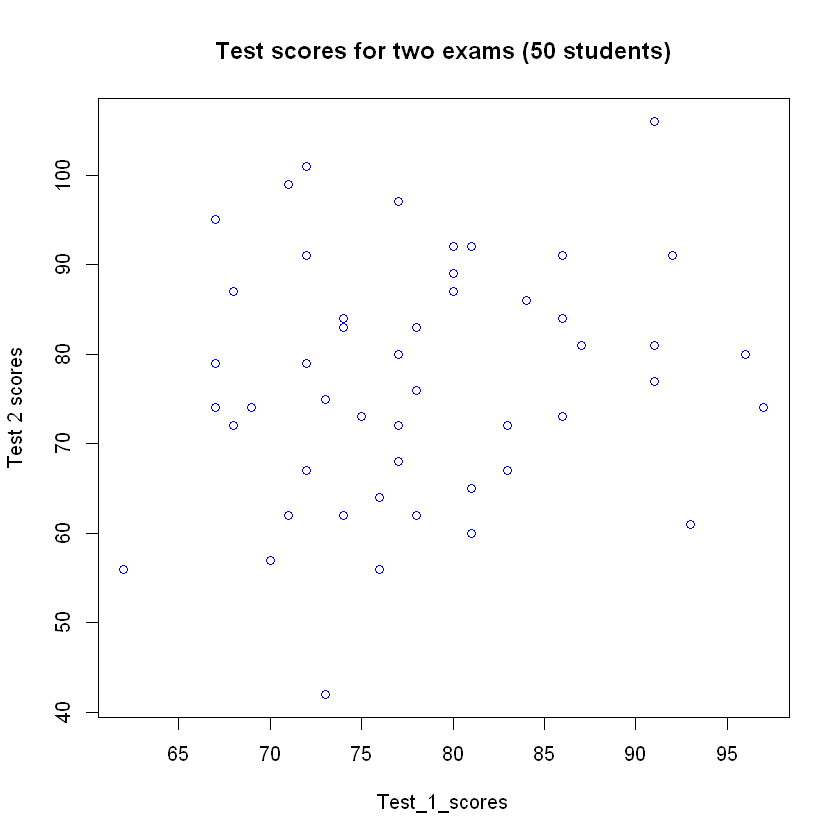

In [12]:
## loading data for Scatterplot
Test_1_scores=round(rnorm(50, 78, 10))
Test_2_scores=round(rnorm(50, 78, 14))

plot(Test_2_scores~Test_1_scores, main='Test scores for two exams (50 students)', xlab='Test_1_scores', ylab='Test 2 scores', col='blue')

<h2><center>2. Linear Regression in R</center></h2>
___

#### Objectives:

- Perform a simple linear regression with R
- plot time series data
- fit a linear model to a set of ordered pairs
- assess normality of residuals
- test whether the slope of the fitted line is zero

### Load Dataset

A time series of 468 observations; monthly from 1959 to 1997 containing atmospheric concentrations of CO22 are expressed in parts per million 


In [ ]:
help(co2) ## Shows info about the dataset
class(co2) ## Shows that it is a timeseries data

### Plotting the timeseries

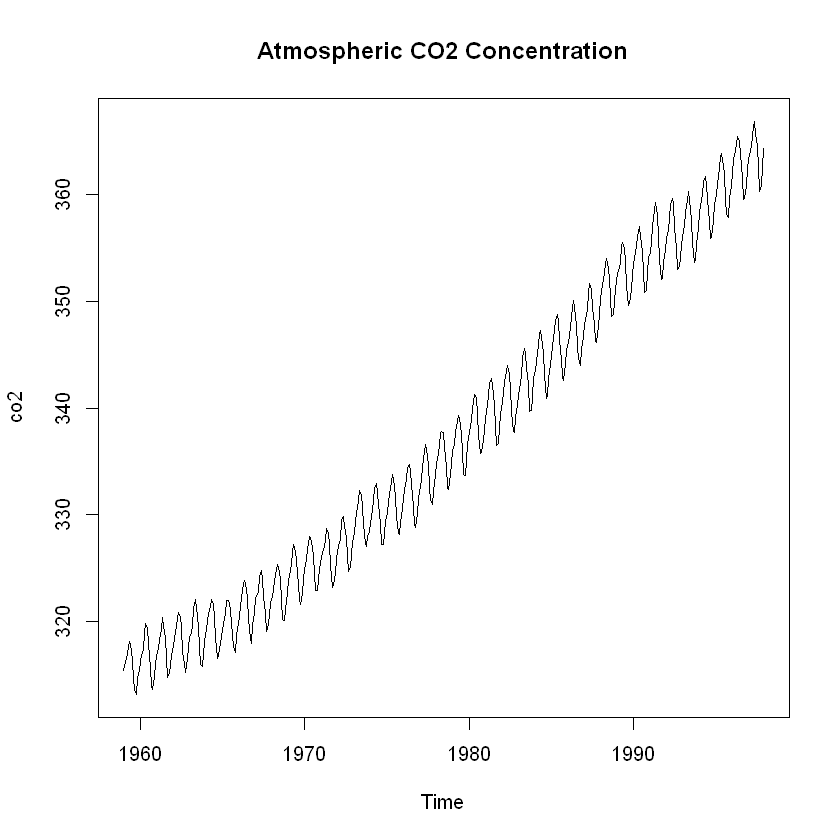

In [21]:
plot(co2, main='Atmospheric CO2 Concentration')

CO2 concentration is apparently increasing with time over this period. Also, even though a
straight line obviously misses some crucial behavior it isn’t entirely useless in that it can be used
to model the trend in the data.

$Y_{1}$ = linear model plus noise = ($\beta_{0}$ + $\beta_{1}$$x_{i}$) + $\epsilon_{i}$

Where $Y_{1}$ is the response variable(co2 conc) <br>
and $x_{i}$ is any explanatory variable with error $\epsilon_{i}$

### Assumptions

In case of the **simple linear regression**, we make the following assumptions:
- Errors are normally distributed and on avearge, Zero
    - E[$\epsilon_{i}$] = 0
- Errors have the same variance (homoscedastic)
    - Var[$\epsilon_{i}$] = constant = $\sigma^{2}$
- Errors are unrelated to each other (independent across observations)
    - Cov[$\epsilon_{i}$, $\epsilon_{j}$] = 0
    
But in reality, the errors can arise in variety of ways:
- measurement error
- lack of knowledge of other important imfluences

### OLS
Using OLS, we are trying to find a straight line that minimizes a quality term 

**Q = $\sum$(Observed - Predicted)^2**

If we wish to perform some inferences (confidence intervals, hypothesis tests), then we need to
make distributional assumptions.

### Calculating Slope and Intercepts


In [23]:
co2.values = as.numeric(co2)
co2.times = as.numeric( time(co2) )
SSxx = sum( (co2.times - mean(co2.times) ) * (co2.times - mean(co2.times) ) )
SSxy = sum( (co2.values - mean(co2.values) ) * (co2.times - mean(co2.times) ) )
( slope = SSxy / SSxx )
( intercept = mean(co2.values) - slope*mean(co2.times) )

[1] 1.307497

[1] -2249.774

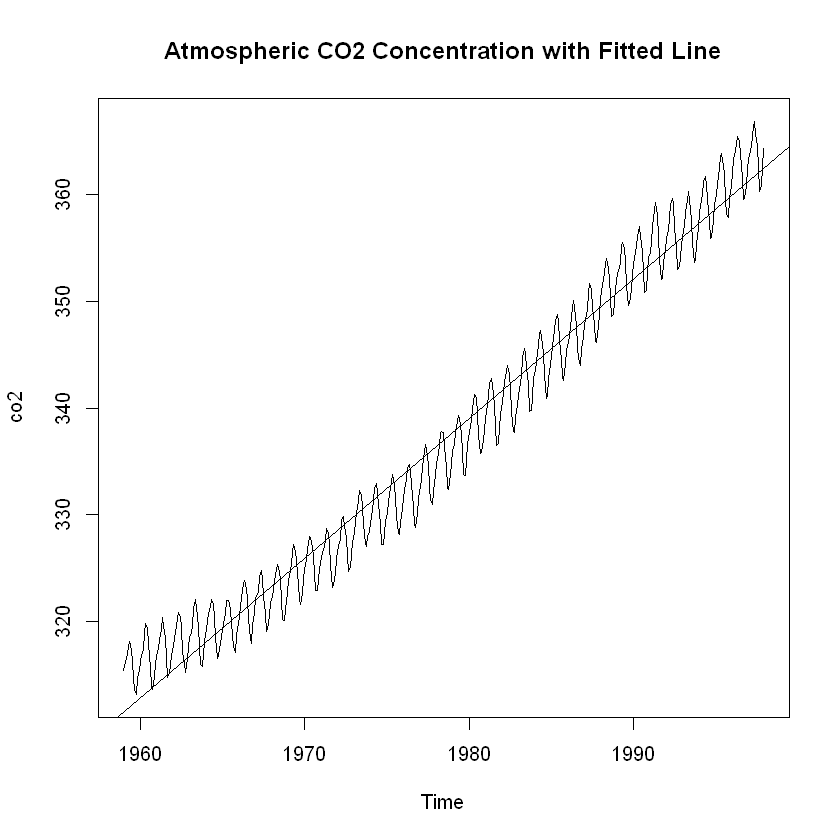

In [24]:
## Using R command to calculate the same
co2.linear.model = lm(co2 ~ time(co2) )

## Plotting the line against the graph
plot(co2, main='Atmospheric CO2 Concentration with Fitted Line')
abline(co2.linear.model )

### Calculating & Plotting Residuals

Residuals are obtained by subtracting the observed responses from the fitted values. 

In [25]:
co2.fitted.values = slope*co2.times + intercept
co2.residuals = co2.values - co2.fitted.values

To check the distribution of the residuals we can :
1. Use a histogram 
2. Use a normal probability plot

**resid** function automatically calculates the residuals of the model



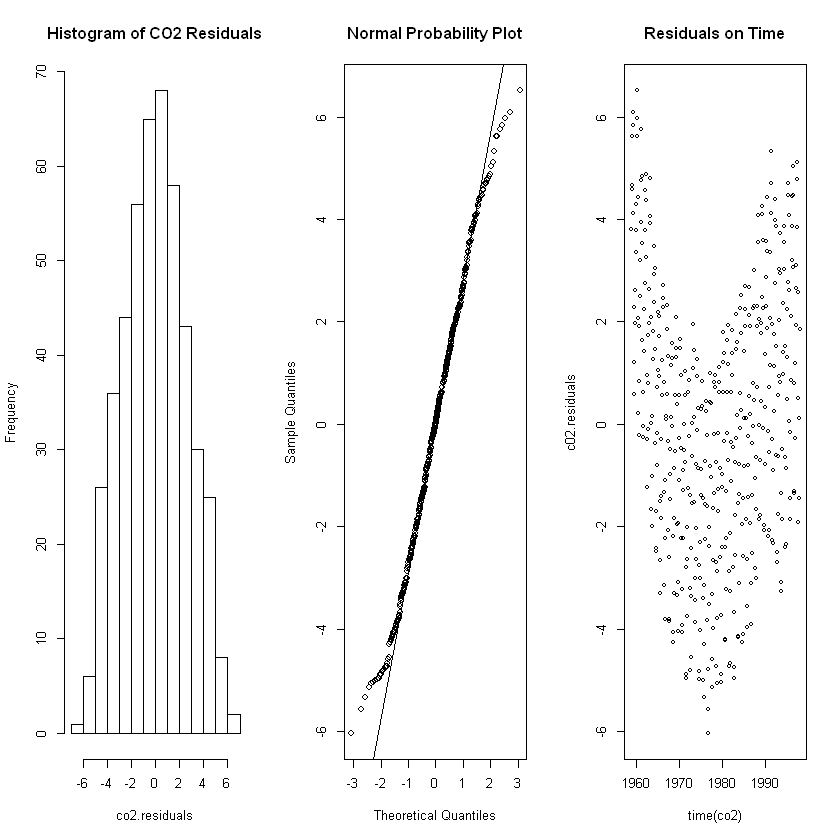

In [33]:
par(mfrow=c(1,3))
c02.residuals = resid( co2.linear.model )
hist(co2.residuals, main= "Histogram of CO2 Residuals")
qqnorm(c02.residuals, main= "Normal Probability Plot")
qqline(c02.residuals)
plot(c02.residuals ~ time(co2), main="Residuals on Time")

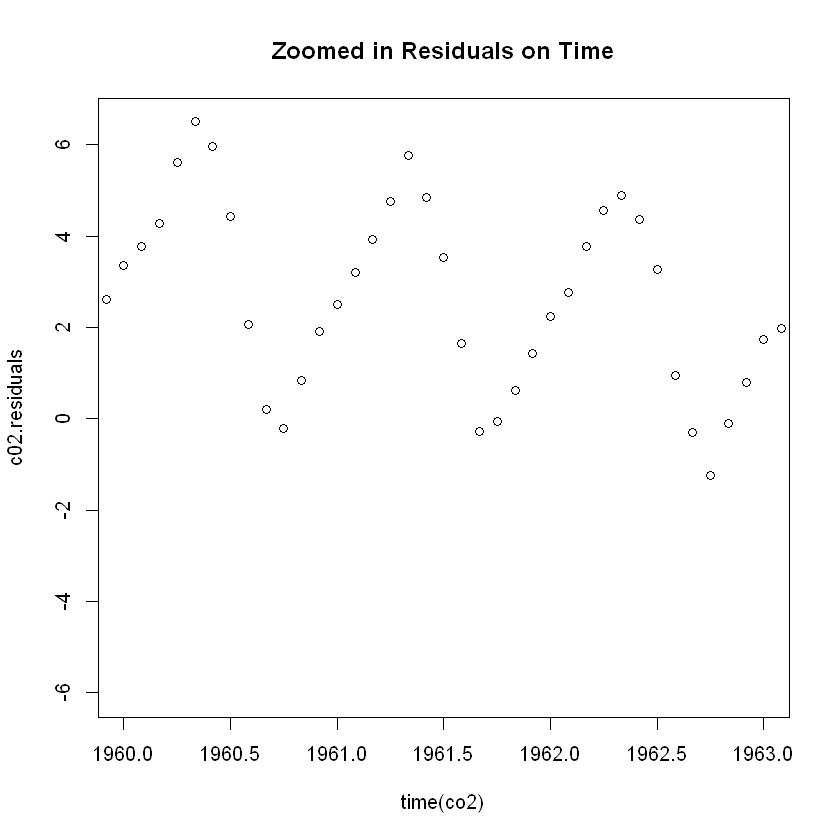

In [35]:
## Zooming in the plot to see the oscillations
plot(c02.residuals ~ time(co2), xlim=c(1960, 1963), main="Zoomed in Residuals on Time")

<h2><center>3. T-Test in R</center></h2>
___

One of the most common tests in statistics is the t-test, used to determine whether the means of two groups are equal to each other. The assumption for the test is that both groups are sampled from normal distributions with equal variances. The null hypothesis is that the two means are equal, and the alternative is that they are not.

In [36]:
## load the dataset
help(sleep)

The data consists of **increase in the hours** of sleep of 10 persons under the effect of 2 drugs represented by **groups**
#### Objective
The aim of this is to find out if there is any difference in the average response to each of the two drugs.

### Box Plot of two groups

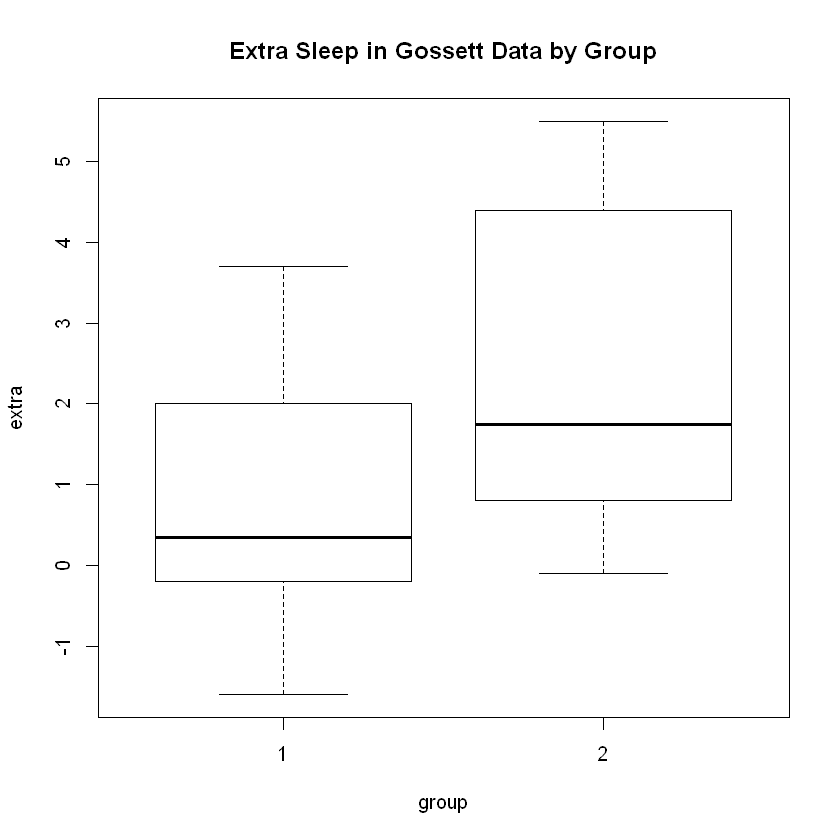

In [37]:
##plotting the data
plot(extra~group, data=sleep, main = "Extra Sleep in Gossett Data by Group")

The box plot shows that there is a perceptible difference in averages of the extra sleeping hours for the two groups. 
But we will use the **t-test** to statistically prove the difference with confidence

### T-Test(paired)

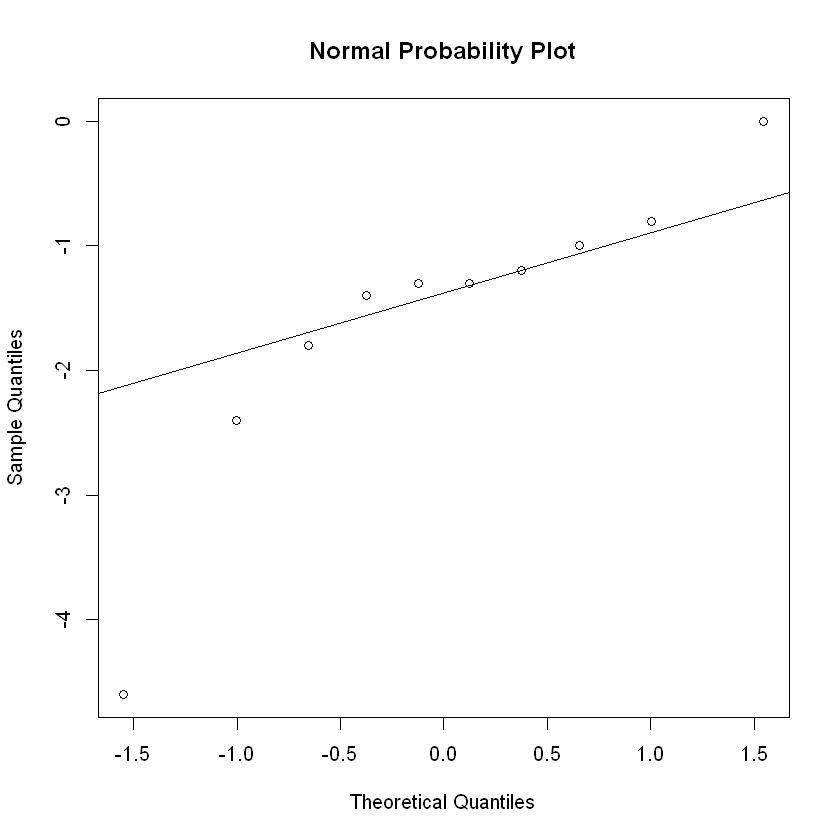

In [49]:
# attach(sleep)
extra.1=sleep$extra[group==1]
extra.2=sleep$extra[group==2]

## for the test to be meaningful, we assume that the population of differences is normally distributed. 
diffs = extra.1-extra.2
qqnorm(diffs, main= "Normal Probability Plot")
qqline(diffs)

### Running a paired T-test

In [47]:
t.test(extra.1, extra.2, paired=TRUE, alternative="two.sided")


	Paired t-test

data:  extra.1 and extra.2
t = -4.0621, df = 9, p-value = 0.002833
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.4598858 -0.7001142
sample estimates:
mean of the differences 
                  -1.58 


#### Inference
As the p-value is quite small(<0.01), the difference is significant at the customary $\alpha$ = 0.01 level 

So, we can reject the _null Hypothesis_ that the difference in the mean is 0

Also the mean difference(0) does not lie in between the 95% CIs, which further suggests that the difference is significant.



___
#### References:
1. Coursera- Practical Time Series
2. Thistleton and Sadigov - Reviewing Basic Statistics